# Mini Project 1
## Predicting Vehicle MPG

In [6]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Auto MPG Data Set
Data Set Characteristics: Multivariate

Attribute Characteristics: Categorical, Real

Number of Attributes: 9 including class attribute

Number of Instances: 398

Area: N/A

Date Donated: 1993-07-07

Associated Tasks: Regression

Missing Values?: Yes

## Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  REMOVED continuous
    7. model year:    multi-valued discrete
    8. origin:        REMOVED multi-valued discrete
    9. car name:      REMOVED (from csv)string (unique for each instance)

In [7]:
data = np.loadtxt(os.path.join('Data', 'auto-mpg.csv'),
                  delimiter=',',usecols=[0,1,2,3,4,5,6,7],
                 skiprows=1)
names = ['cylinders', 'displacement','horsepower','weight','model year']
#print(data)
# Remove columns 7 and 5, for origin and acceleration values
data = np.delete(data, 7, 1)
data = np.delete(data, 5, 1)

# Split data into X for attribues and y for label
X,y = data[:, 1:], data[:,0]
#print(X)
#print(y)
m = y.size

In [8]:
def plotHist(x,name):
    #pyplot.style.use('ggplot')
    fig, ax = pyplot.subplots()
    ax.hist(x)
    ax.set_xlabel(name)
    ax.set_ylabel('Frequency')

In [9]:
def plotWithY(x,y,name):
    fig, ax = pyplot.subplots()
    ax.set_xlabel(name)
    ax.set_ylabel('MPG')
    ax.plot(x,y,'ro',ms=10,mec='k')

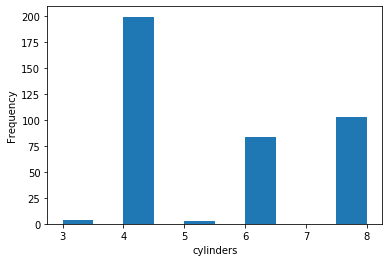

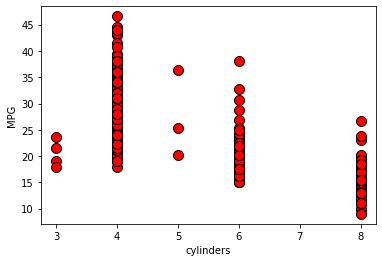

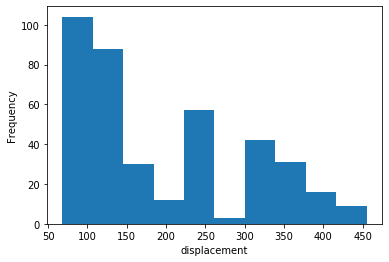

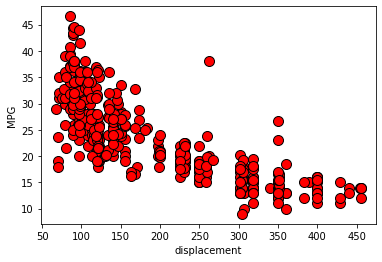

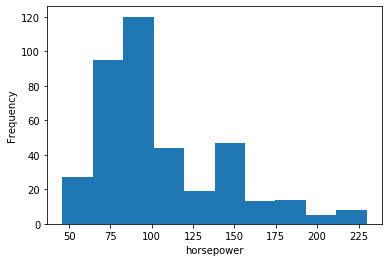

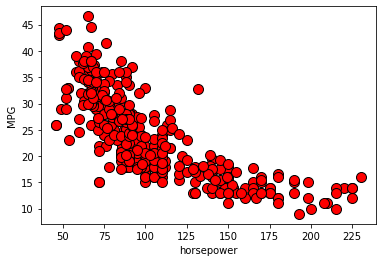

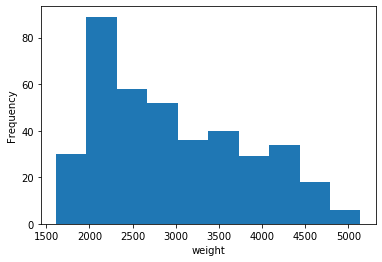

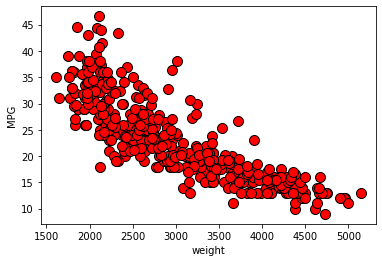

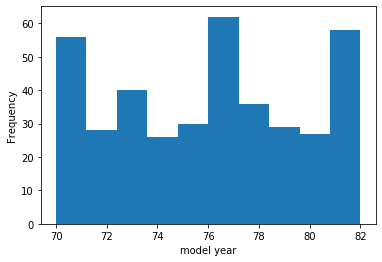

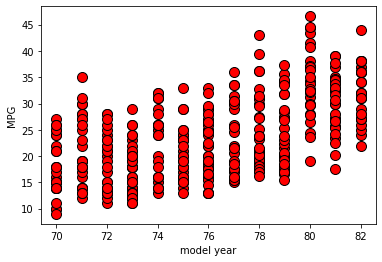

In [10]:
for i in range(len(names)):
    plotHist(X[:,i],names[i])
    plotWithY(X[:,i],y,names[i])